# R Jupyter Notebooks

In [1]:
library(sf)
library(spdep)

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3
Loading required package: sp
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`


## Read data

There's an error reading locally (Roger?):

In [2]:
#db <- st_read("`../data/lux_tmerc.gpkg`")

But we can read from the web:

In [3]:
db <- st_read("https://github.com/rsbivand/ectqg19-workshop/raw/master/data/lux_tmerc.gpkg")

Reading layer `lux_tmerc' from data source `https://github.com/rsbivand/ectqg19-workshop/raw/master/data/lux_tmerc.gpkg' using driver `GPKG'
Simple feature collection with 102 features and 16 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 48930.89 ymin: 57015.29 xmax: 106113.8 ymax: 138759.2
epsg (SRID):    NA
proj4string:    +proj=tmerc +lat_0=49.8333333333333 +lon_0=6.16666666666667 +k=1 +x_0=80000 +y_0=100000 +ellps=intl +towgs84=-189.6806,18.3463,-42.7695,-0.33746,-3.09264,2.53861,0.4598 +units=m +no_defs


In [4]:
names(db)

[1] "POPULATION"     "COMMUNE_1"      "LAU2"           "X_subtype"     
 [5] "COMMUNE"        "DISTRICT"       "CANTON"         "tree_count"    
 [9] "ghsl_pop"       "light_level"    "area"           "area_err"      
[13] "pop_den"        "ghsl_den"       "ghsl_tiff"      "ghsl_warp_diff"
[17] "geom"

## Make (static) maps

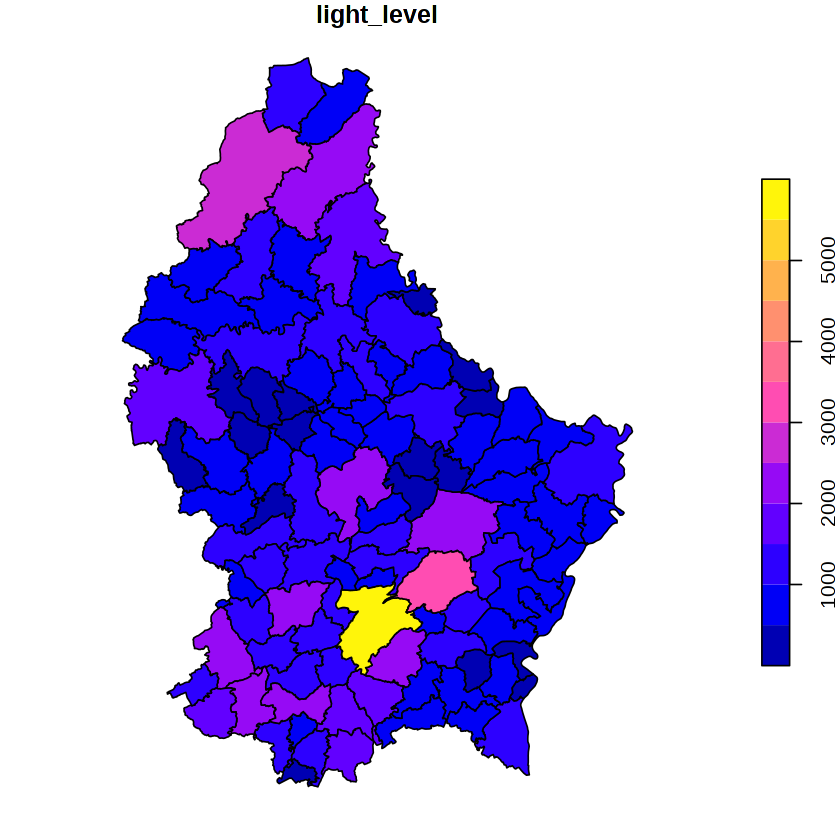

In [5]:
plot(db["light_level"])

## Build Spatial Weights

In [6]:
nb_cont <- poly2nb(db, row.names=as.character(db$LAU2))
nb_cont

Neighbour list object:
Number of regions: 102 
Number of nonzero links: 528 
Percentage nonzero weights: 5.074971 
Average number of links: 5.176471 

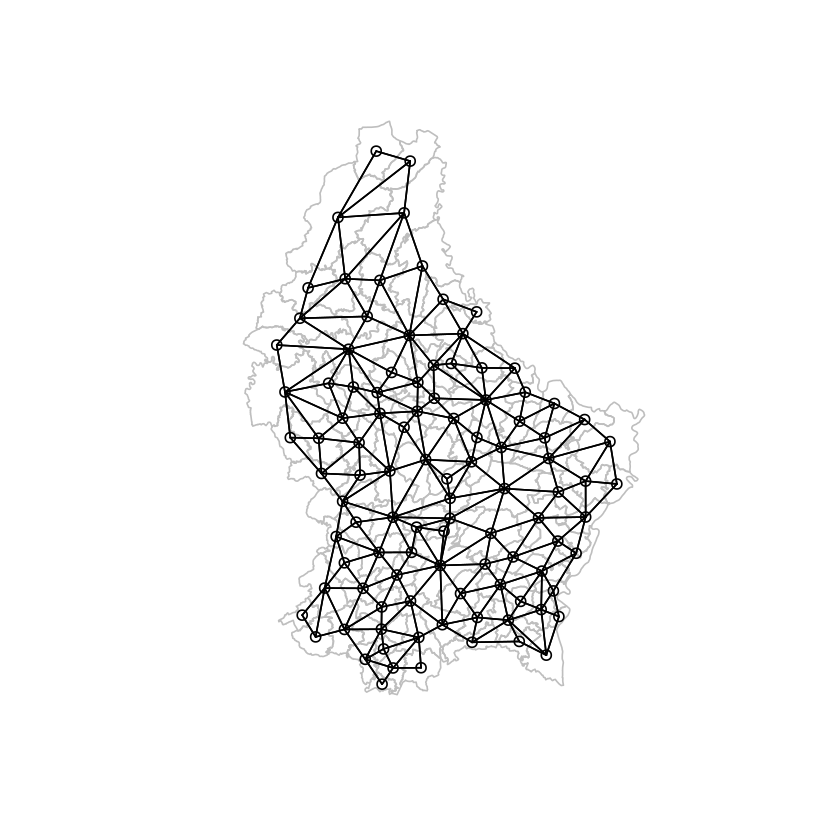

In [7]:
plot(st_geometry(db), border="grey")
crds <- st_centroid(st_geometry(db))
plot(nb_cont, crds, add=TRUE)

## LISA statistics

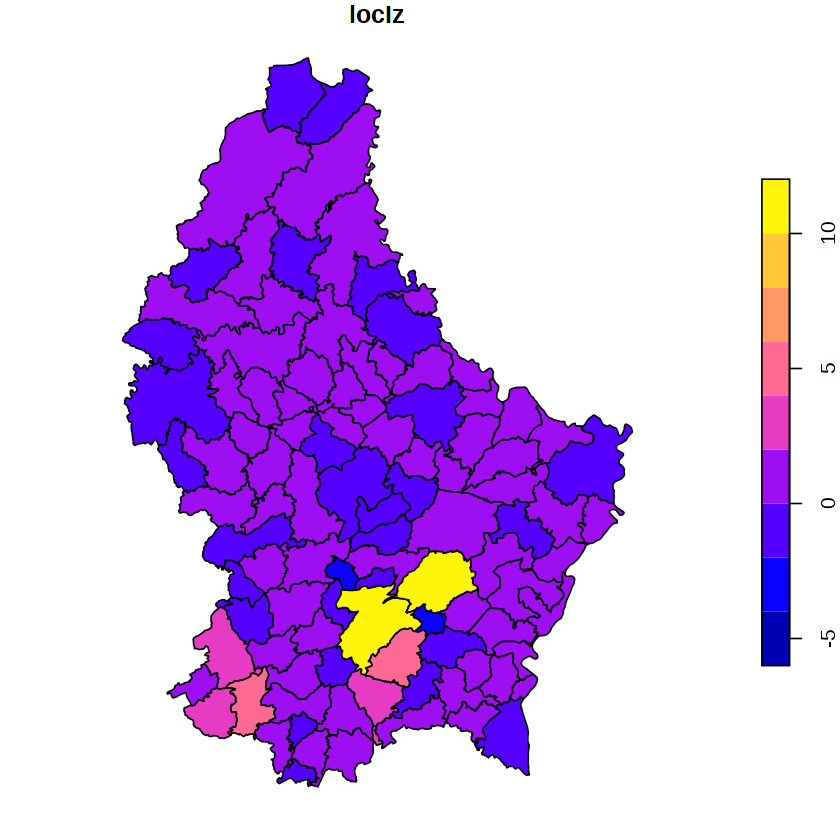

In [8]:
locm <- localmoran(db$light_level, 
                   listw=nb2listw(nb_cont),
                   alternative="two.sided")
db$locIz <- locm[,4]
plot(db[,"locIz"],
     breaks=seq(-6, 12, 2))